# Kaggle titanic - DecisionTree

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

print("shape:", train.shape, test.shape)
print(train.dtypes)

('shape:', (891, 12), (418, 11))
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


## Data Exploration

### Univariate Analysis

In [6]:
# Continuous variable
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Categorical variable
cat_vars = train.dtypes.loc[train.dtypes == "object"].index
print(cat_vars)

Index([u'Name', u'Sex', u'Ticket', u'Cabin', u'Embarked'], dtype='object')


In [9]:
train[cat_vars].apply(lambda x: len(x.unique()))

Name        891
Sex           2
Ticket      681
Cabin       148
Embarked      4
dtype: int64

### Multivariate analysis

Survived    0    1  All
Pclass                 
1          80  136  216
2          97   87  184
3         372  119  491
All       549  342  891

Survived         0         1  All
Pclass                           
1         0.370370  0.629630    1
2         0.527174  0.472826    1
3         0.757637  0.242363    1
All       0.616162  0.383838    1


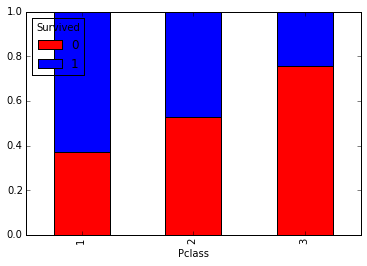

In [30]:
# Survived and pclass
table = pd.crosstab(train.Pclass, train.Survived, margins=True)
per_table = table.div(table.iloc[:,-1], axis=0)
print(table)
print("")
print(per_table)

%matplotlib inline
per_table.iloc[:-1,:-1].plot(kind="bar", stacked=True, color=["red","blue"], grid=False)

Survived    0    1  All
Sex                    
female     81  233  314
male      468  109  577
All       549  342  891

Survived         0         1  All
Sex                              
female    0.257962  0.742038    1
male      0.811092  0.188908    1
All       0.616162  0.383838    1


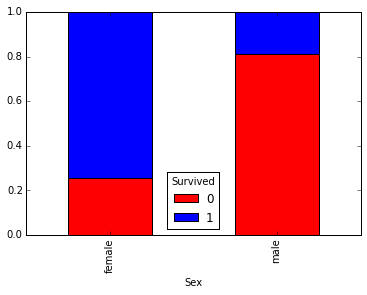

In [31]:
# Survived and Age
table = pd.crosstab(train.Sex, train.Survived, margins=True)
per_table = table.div(table.iloc[:,-1], axis=0)
print(table)
print("")
print(per_table)
%matplotlib inline
per_table.iloc[:-1,:-1].plot(kind="bar", stacked=True, color=["red","blue"], grid=False)

Survived    0    1  All
Embarked               
C          75   93  168
Q          47   30   77
S         427  217  644
All       549  342  891

Survived         0         1  All
Embarked                         
C         0.446429  0.553571    1
Q         0.610390  0.389610    1
S         0.663043  0.336957    1
All       0.616162  0.383838    1


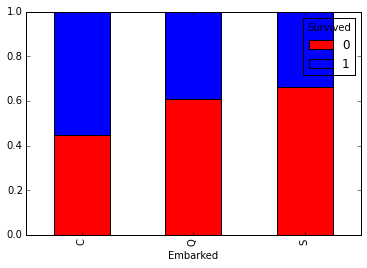

In [32]:
# Survived and Embarked
table = pd.crosstab(train.Embarked, train.Survived, margins=True)
per_table = table.div(table.iloc[:,-1], axis=0)
print(table)
print("")
print(per_table)
%matplotlib inline
per_table.iloc[:-1,:-1].plot(kind="bar", stacked=True, color=["red","blue"], grid=False)

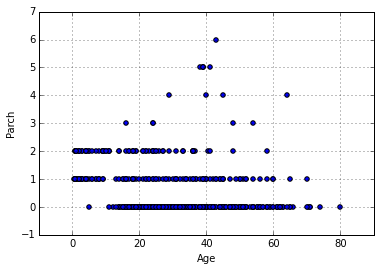

In [47]:
# Age and survived
# ibSp	Parch	Fare
train.plot("Age", "Parch", kind="scatter")

## Treat Missing values

### Check missing values

In [53]:
# Check missing values in train data
train.apply(lambda x: sum(x.isnull()))

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [55]:
# Check missing value in test data
test.apply(lambda x:sum(x.isnull()))

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Imputation - Fill missing values

In [58]:
# Fill Age with median
med = train.Age.median()
train.Age.fillna(med, inplace=True)
test.Age.fillna(med, inplace=True)

In [62]:
# Fill cabin with mode
mod = train.Cabin.mode()[0]
train.Cabin.fillna(mod, inplace=True)
test.Cabin.fillna(mod, inplace=True)

In [64]:
# Fill embarked with mode
train.Embarked.fillna(train.Embarked.mode()[0], inplace=True)

In [65]:
# Check missing values are filled
train.apply(lambda x: sum(x.isnull()))

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## Outliers treatment

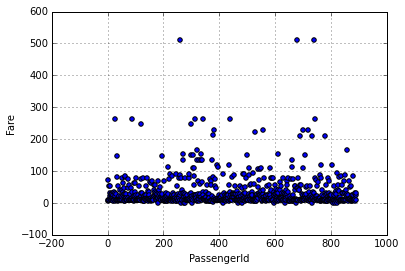

In [69]:
%matplotlib inline
train.plot("PassengerId","Fare", kind="scatter")

## Variable transformation

In [ ]:
# Convert pclass to category
